In [3]:
import pandas as pd
import seaborn as sns
import numpy as np

In [4]:
data = pd.read_csv("C:/Users/ragha/Downloads/BMI.csv")

In [5]:
data.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [6]:
data.tail()

,Gender,Height,Weight,Index
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5
499,Male,173,131,5


In [7]:
data.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


In [15]:
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [17]:
from sklearn.metrics import accuracy_score

In [11]:
data.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


Changing the data to 0 and 1 using Label Encoder because we need it to be Categorical. Label Encoder encodes the tareget variable with values between 0 and classes -1

In [18]:
gender = LabelEncoder()
data['Gender'] = gender.fit_transform(data['Gender'])
#Fit Transformer is used to fit the label encoder and return the encoded labels 

In [20]:
data.head()

,Gender,Height,Weight,Index
0,1,174,96,4
1,1,189,87,2
2,0,185,110,4
3,0,195,104,3
4,1,149,61,3


 We need to segment and sort data values into bins 

In [21]:
bins = (-1,0,1,2,3,4,5)
health = ['malnourished', 'underweight', 'fit', 'slightly overweight', 'overweight', 'exteremely overweight']
data['Index'] = pd.cut(data['Index'], bins = bins, labels = health)

In [22]:
data['Index'] #Replaced the valu of Index with this

0                 overweight
1                        fit
2                 overweight
3        slightly overweight
4        slightly overweight
               ...          
495    exteremely overweight
496               overweight
497    exteremely overweight
498    exteremely overweight
499    exteremely overweight
Name: Index, Length: 500, dtype: category
Categories (6, object): ['malnourished' < 'underweight' < 'fit' < 'slightly overweight' < 'overweight' < 'exteremely overweight']

In [23]:
data['Index'].count()

500

In [24]:
data['Index'].value_counts()

exteremely overweight    198
overweight               130
fit                       69
slightly overweight       68
underweight               22
malnourished              13
Name: Index, dtype: int64

In [25]:
data['Gender'].value_counts()

0    255
1    245
Name: Gender, dtype: int64

C:\Users\ragha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Index', ylabel='count'>

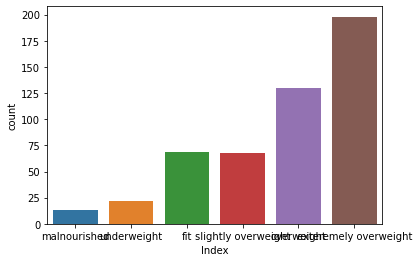

In [26]:
sns.countplot(data['Index'])

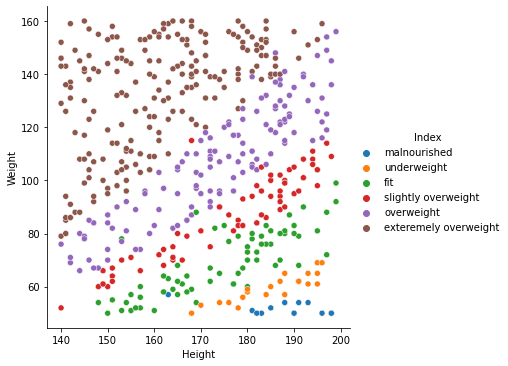

In [28]:
sns.relplot(x='Height', y = 'Weight', hue = 'Index', data = data)

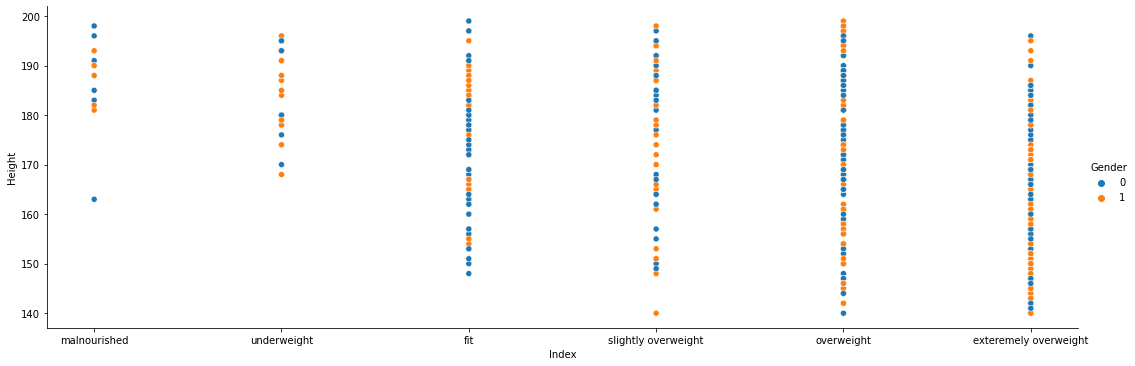

In [33]:
sns.relplot(x='Index', y = 'Height', hue = 'Gender', data = data, height = 5, aspect = 3 )

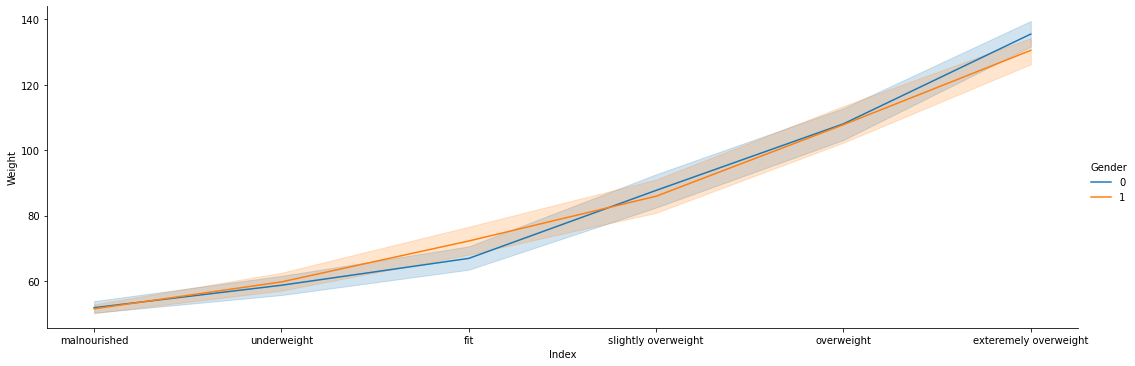

In [35]:
sns.relplot(x='Index', y = 'Weight', hue = 'Gender', kind = 'line' , data = data, height = 5, aspect = 3 )

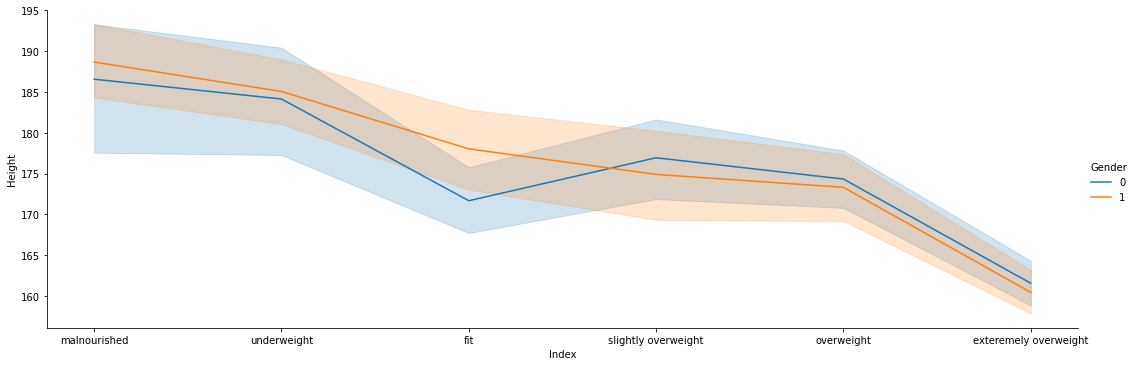

In [36]:
sns.relplot(x='Index', y = 'Height', hue = 'Gender', kind = 'line' , data = data, height = 5, aspect = 3 )

Prediction BMI using Linear Support Vector Classifier.
Its objective is to fit to the data you provide returning a best fir hyperplane then divides or categorizes the data. 

In [37]:
x = data.drop('Index', axis = 1)
y = data['Index']

In [ ]:
#SVM works by mapping the data to a high dimensional feature space so that data pointscan be categorized 

In [38]:
 x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

In [39]:
s = StandardScaler()
x_train = s.fit_transform(x_train)
x_test = s.transform(x_test)

In [40]:
clf = svm.SVC()
clf.fit(x_train, y_train)
pred = clf.predict(x_test)

In [44]:
print(classification_report(y_test, pred))

                       precision    recall  f1-score   support

exteremely overweight       0.88      0.97      0.92        36
                  fit       0.73      0.80      0.76        10
         malnourished       0.00      0.00      0.00         3
           overweight       0.96      0.78      0.86        32
  slightly overweight       0.78      0.93      0.85        15
          underweight       0.60      0.75      0.67         4

             accuracy                           0.85       100
            macro avg       0.66      0.71      0.68       100
         weighted avg       0.84      0.85      0.84       100



In [45]:
print(confusion_matrix(y_test, pred))

[[35  0  0  1  0  0]
 [ 0  8  0  0  2  0]
 [ 0  1  0  0  0  2]
 [ 5  0  0 25  2  0]
 [ 0  1  0  0 14  0]
 [ 0  1  0  0  0  3]]


In [46]:
print(accuracy_score(y_test, pred))

0.85


In [52]:
a = [[0,180,117]]
a = s.transform(a)
b = clf.predict(a)

In [53]:
b

array(['overweight'], dtype=object)

In [49]:
data

,Gender,Height,Weight,Index
0,1,174,96,overweight
1,1,189,87,fit
2,0,185,110,overweight
3,0,195,104,slightly overweight
4,1,149,61,slightly overweight
...,...,...,...,...
495,0,150,153,exteremely overweight
496,0,184,121,overweight
497,0,141,136,exteremely overweight
498,1,150,95,exteremely overweight
